In [1]:
from math import sqrt

import numpy as np

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import skimage
from skimage import io, exposure, img_as_float, img_as_ubyte, morphology, filters, util
from skimage.color import rgb2gray, label2rgb
from skimage.feature import canny, blob_dog, blob_log, blob_doh,  peak_local_max
from skimage.filters import sobel, threshold_otsu, try_all_threshold, threshold_local, threshold_minimum
from skimage.segmentation import clear_border, watershed, random_walker
from skimage.measure import label, regionprops
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.morphology import closing
from skimage.io import imsave, imread

import cv2

from scipy import ndimage as ndi
from scipy.stats import norm

import os

import plotly.graph_objs as go

import platform

In [2]:
image_filename = '/Users/carolinemccue/Dropbox (MIT)/Project_ReversibleCellAdhesion_Broad/Shear Experiments/Constant Shear Force/2.5um3/0.1ml.tif'
#image_filename = '/Users/carolinemccue/Dropbox (MIT)/Project_ReversibleCellAdhesion_Broad/Shear Experiments/Constant Shear Force/2.5um3/24.43ml_2min.tif'

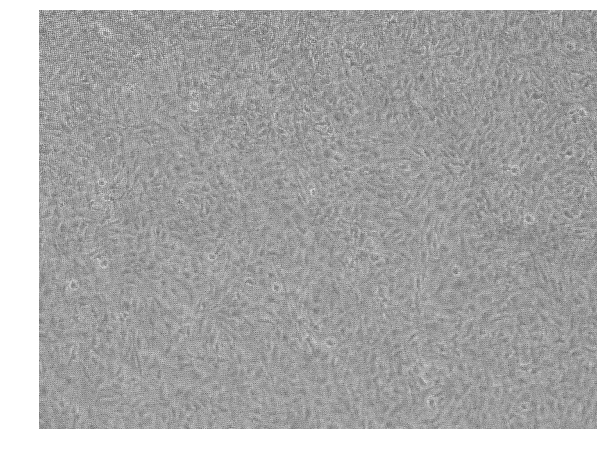

In [3]:
image = cv2.imread(image_filename, 0)
fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255, interpolation='nearest')

In [4]:
#image = np.invert(image)
#fig = plt.figure(figsize=(10,10))
#plt.axis('off')
#plt.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255, interpolation='nearest')

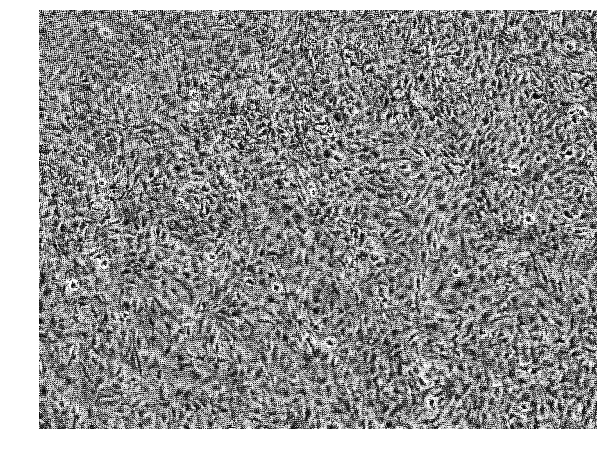

In [5]:
# Adaptive Equalization
clahe = cv2.createCLAHE(clipLimit=20, tileGridSize=(10,10))
img_adapteq = clahe.apply(image)
fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_adapteq, cmap=plt.cm.gray, interpolation='nearest')

Minimum threshold: 180.0
Min intensity: 0
Max intensity: 255


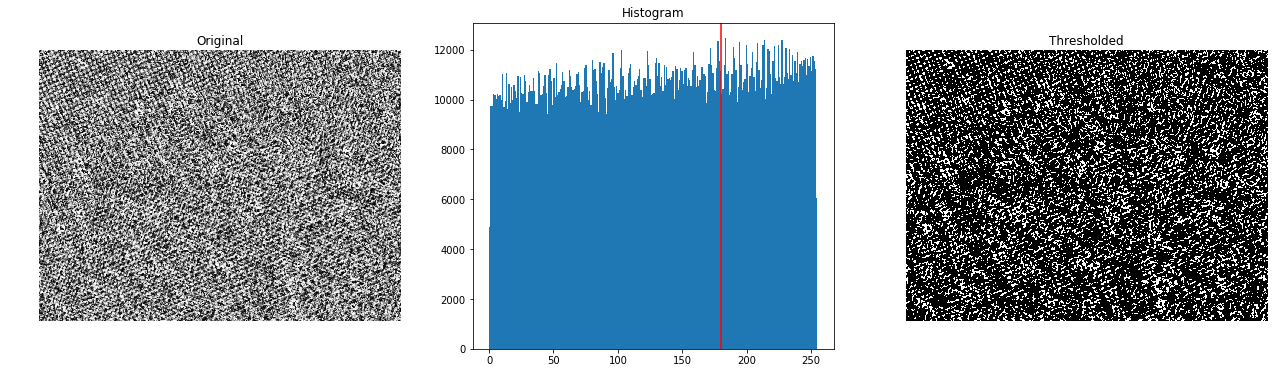

In [6]:
image = img_adapteq

blur = cv2.GaussianBlur(image,(3,3),0)
retVal, binary = cv2.threshold(blur,180,255,cv2.THRESH_BINARY)

fig, axes = plt.subplots(ncols=3, figsize=(22, 6))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(retVal, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

print('Minimum threshold: ' + str(retVal))
print('Min intensity: ' + str(np.min(image)))
print('Max intensity: ' + str(np.max(image)))
plt.show()

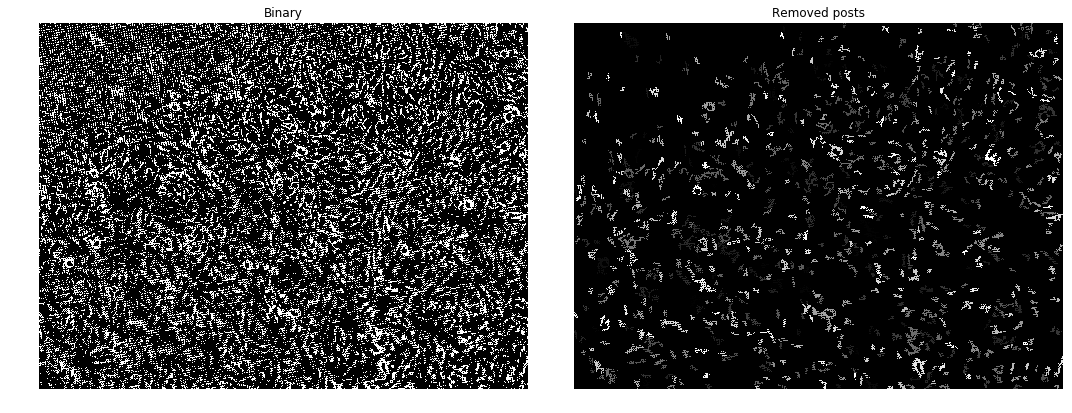

In [7]:
from skimage.morphology  import binary_closing, disk, binary_dilation, remove_small_holes, remove_small_objects


noise = skimage.measure.label(binary)
remove_posts = morphology.remove_small_objects(noise, min_size=150)
remove_posts = remove_posts.astype(np.uint8)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Binary')
#ax[1].imshow(closed, cmap=plt.cm.gray, interpolation='nearest')
#ax[1].set_title('Closed')
ax[1].imshow(remove_posts, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Removed posts')



for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()
#plt.savefig("2_thresh_close.jpg")

In [8]:
cellarea = np.sum(remove_posts > 0)
background = np.sum(remove_posts == 0)
cellpercent = cellarea / (cellarea + background)
print(cellpercent)

0.09319299768518519
